<a href="https://colab.research.google.com/github/PatrickBassan/FabProd/blob/main/N2_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N2 - Ciência de Dados
**Aluno:** Patrick de Freitas Bassan

## O problema
Considere a empresa FabProdresponsável por fabricar e distribuir uma família de produtos de limpeza de veículos para região Sul do Brasil. No entanto, CEO dessa empresa não tem conhecimento do quanto a FabProdpode expandir a distribuição nessa regiãoe nas demais regiões do Brasil. O CEO têm apenas informações sobre as vendas oriundas do ERP, e está interessado em conhecer melhor as possibilidades de expansão dos negócios para FabProd. Ele sabe que existe uma área multidisciplinar (ciência de dados) que pode ajudá-lo, mas ele não sabe como.

## Os dados
Para gerar os dados, foram selecionadas todas cidades da região sul do Brasil junto de seu respectivo Estado e população.


In [78]:
import pandas as pd
import numpy as np

# importando o dataset
df = pd.read_csv("vendas.csv")

# visualizando os dados
df.head()

,pos,cidade,populacao,estado,vendas
0,1,Curitiba,1917185,PR,NaN
1,2,Porto Alegre,1479101,RS,NaN
2,3,Joinville,583144,SC,NaN
3,4,Londrina,563943,PR,NaN
4,5,Caxias do Sul,504069,RS,NaN


Como não existiam valores de venda, foi utilizado uma função de randomização para obter os dados.

In [79]:
# gerando dados de vendas para as cidades sem valores
df['vendas'] = abs(np.round(np.random.normal(loc=10000, scale=5000, size=len(df["cidade"])), decimals=0))

print(df["vendas"])

0     17111.0
1     13468.0
2     13307.0
3      1243.0
4      8465.0
       ...   
73     7691.0
74      503.0
75     3902.0
76    14769.0
77    13148.0
Name: vendas, Length: 78, dtype: float64


Usando esses dados, podemos começar a fazer algumas análises que ajudarão a entender melhor o potencial de expansão da FabProd.

Primeiro, podemos criar um gráfico de barras para visualizar as diferenças de vendas entre as cidades:


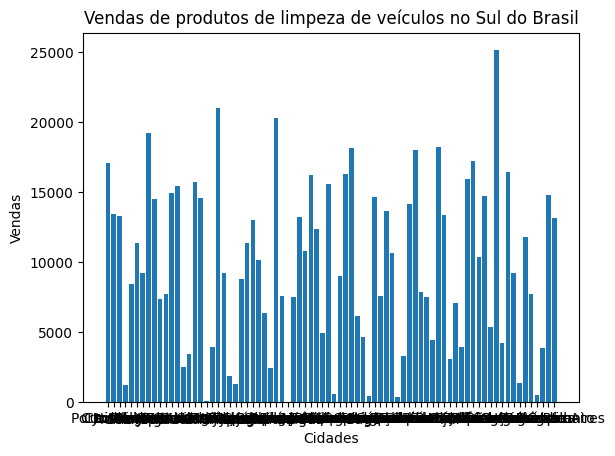

In [80]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras
plt.bar(df['cidade'], df['vendas'])

# Adicionar título e rótulos aos eixos
plt.title('Vendas de produtos de limpeza de veículos no Sul do Brasil')
plt.xlabel('Cidades')
plt.ylabel('Vendas')

# Exibir o gráfico
plt.show()

Para facilitar a leitura, podemos também gerar um gráfico considerando apenas os estados

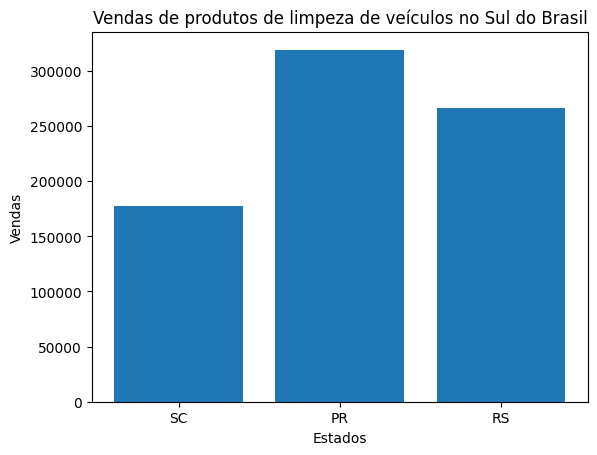

In [81]:
# Total de vendas em SC
sc_total = df[df['estado'] == 'SC']['vendas'].sum()

# Total de vendas em PR
pr_total = df[df['estado'] == 'PR']['vendas'].sum()

# Total de vendas em RS
rs_total = df[df['estado'] == 'RS']['vendas'].sum()

estados = ["SC", "PR", "RS"]
vendas = [sc_total, pr_total, rs_total]

# Criar o gráfico de barras
plt.bar(estados, vendas)

# Adicionar título e rótulos aos eixos
plt.title('Vendas de produtos de limpeza de veículos no Sul do Brasil')
plt.xlabel('Estados')
plt.ylabel('Vendas')

# Exibir o gráfico
plt.show()

Com isso conseguimos ver que a maioria das vendas foram feitas para o estado do Paraná, com o Rio Grande do Sul ficando em segundo lugar e Santa Catarina ficando mais pra trás.

Podemos gerar também um gráfico com a quantidade de população em cada estado:

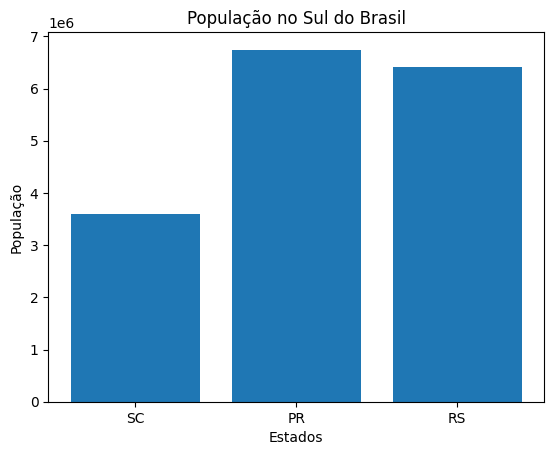

In [82]:
import seaborn as sns

# Total de pessoas em SC
sc_pop = df[df['estado'] == 'SC']['populacao'].sum()

# Total de pessoas em PR
pr_pop = df[df['estado'] == 'PR']['populacao'].sum()

# Total de pessoas em RS
rs_pop = df[df['estado'] == 'RS']['populacao'].sum()

pop = [sc_pop, pr_pop, rs_pop]

# # Criar o gráfico de barras
plt.bar(estados, pop)

# # Adicionar título e rótulos aos eixos
plt.title('População no Sul do Brasil')
plt.xlabel('Estados')
plt.ylabel('População')

# # Exibir o gráfico
plt.show()

Com isso, vemos que o Paraná também tem um número maior de população. Com isso podemos considerar que talvez em estados com maior número de população teremos mais vendas.

Para tentar visualizar as relações entre as variáveis, podemos gerar um gráfico de correlação.

<ipython-input-83-710aca4ce633>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,square=True,


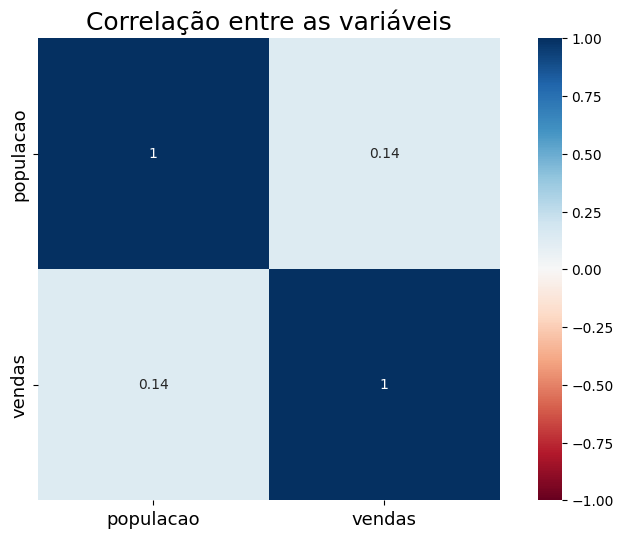

In [83]:
# Removendo a coluna de posição do dataset

df.drop(['pos'], axis=1, inplace=True)

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlação entre as variáveis',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

Podemos então, começar a trabalhar no nosso modelo de predição. Sendo que primeiramente faremos um tratamento dos dados para converter os estados em valores númericos. Para esse modelo iremos desconsiderar os nomes das cidades e iremos olhar apenas pra sua população.

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['estado'] = le.fit_transform(df['estado'])

df['estado']

0     0
1     1
2     2
3     0
4     1
     ..
73    2
74    1
75    1
76    0
77    1
Name: estado, Length: 78, dtype: int64

Agora vamos separar as variáveis independentes (população e estado) da variável dependente (valor) e converter as variáveis categóricas (população e estado) em variáveis numéricas usando a técnica de codificação one-hot:

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Separar as variáveis independentes e dependentes
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 3].values

# Codificar as variáveis categóricas usando one-hot
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


O próximo passo é dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste:

In [96]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Agora criamos o modelo de regressão e ajustamos aos dados de treinamento:

In [97]:
# Criar o modelo de regressão
regressor = LinearRegression()

# Treinar o modelo de regressão
regressor.fit(X_train, y_train)

LinearRegression()

Por fim, usamos o modelo treinado para fazer previsões nos dados de teste e avaliar o desempenho do modelo usando uma métrica de erro, como o erro médio absoluto (MAE) ou o erro quadrático médio (MSE):

In [124]:
# Fazer previsões nos dados de teste
y_pred = regressor.predict(X_test)

# Calcular o MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calcular o MSE
mse = np.mean(np.square(y_pred - y_test))

print("MAE")
print(mae)
print("MSE")
print(mse)

MAE
3975.8404365553665
MSE
22915755.190590158


Então, faremos a predição de vendas para os outros estados do Brasil.

In [116]:
# Codificar as variáveis independentes para as vendas em outro estado
X_new = pd.DataFrame({'populacao': [46024937,20732660,16615526,14659023,9051113,8936431,8442962,6950976,6800605,4108508,4030961,3952262,3784239,3303953,3270174,3125254,2923369,2833742,2211868,1616379,1584306,829780,774268,634805],
                      'estado': ['SP','MG','RJ','BA','PE','CE','PA','GO','MA','ES','PB','AM','MT','RN','Pi','AL','DF','MS','SE','RO','TO','AC','AP','RR']})

X_new['estado'] = le.fit_transform(X_new['estado'])
encoder = OneHotEncoder(sparse=False)
X_new_encoded = encoder.fit_transform(X_new)
pred = regressor.predict(X_new_encoded)


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: ignored

Infelizmente, com o erro na execução da previsão, não foi possível visualizar os resultados.

# Concluindo
Como não consegui fazer o modelo prever as vendas em outros estados, não foi possível chegar num resultado pelo modelo de predição.

Mas analisando os gráficos gerados anteriormente, podemos concluir que estados com maior população tendem a gerar mais vendas. Com dados mensais das vendas, poderiamos ter buscado se existe alguma época em que as vendas sejam mais frequentes. É importante também considerar o quão desenvolvidas são as ruas de cada cidade, pois isso afetaria a quantidade de veículos e também o quão frequente eles serião limpos, dependendo de quantas estradas de chão exitem.

Outro dado que poderia afetar as vendas, seriam as profissões predominantes de cada cidade, talvez em cidades agrículas não ocorreria muitas vendas de produtos de limpeza.

Com essas informações, a FabProd poderia identificar áreas com maior potencial de crescimento para seus produtos de limpeza de veículos e adaptar sua estratégia de vendas e marketing para atender melhor às necessidades dessas regiões. Além disso, a análise de dados pode ajudar a empresa a otimizar sua cadeia produtiva, identificando gargalos e oportunidades de melhoria na produção, armazenamento e distribuição de seus produtos.

Em resumo, a FabProd precisa valorizar os dados que são gerados internamente e externamente da cadeia produtiva em que está inserida, pois esses dados podem fornecer informações valiosas para a tomada de decisões estratégicas e para o crescimento da empresa. A ciência de dados pode ser uma ferramenta poderosa para ajudar a empresa a explorar esses dados e transformá-los em insights acionáveis.